In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv('data.csv')
df.head()

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.22365,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.79678,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000


In [3]:
df.describe()

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,977.044879,6.099315,5.575342,1971.267808,1984.865753,1057.429452,98.238368,1515.463699,140.791124,1.947945,472.980137,43.941274,180921.195890
std,9981.264932,927.289456,1.382997,1.112799,30.202904,20.645407,438.705324,40.757041,525.480383,48.818704,0.794965,213.804841,19.863111,79442.502883
min,1300.000000,120.773900,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,31.029602,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,701.742811,5.000000,5.000000,1954.000000,1967.000000,795.750000,73.927562,1129.500000,104.933938,1.000000,334.500000,31.076054,129975.000000
50%,9478.500000,880.581085,6.000000,5.000000,1973.000000,1994.000000,991.500000,92.113325,1464.000000,136.009992,2.000000,480.000000,44.593440,163000.000000
75%,11601.500000,1077.814155,7.000000,6.000000,2000.000000,2004.000000,1298.250000,120.611320,1776.750000,165.065405,3.000000,576.000000,53.512128,214000.000000
max,215245.000000,19996.906235,10.000000,9.000000,2010.000000,2010.000000,6110.000000,567.637330,5642.000000,524.158726,4.000000,1418.000000,131.736454,755000.000000


In [4]:
df_number = df.select_dtypes(include=[np.number])
df_number

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
0,8450,785.030350,7,5,2003,2003,856,79.524968,1710,158.864130,3,548,50.910844,208500
1,9600,891.868800,6,8,1976,1976,1262,117.243586,1262,117.243586,2,460,42.735380,181500
2,11250,1045.158750,7,5,2001,2002,920,85.470760,1786,165.924758,3,608,56.485024,223500
3,9550,887.223650,7,5,1915,1970,756,70.234668,1717,159.514451,1,642,59.643726,140000
4,14260,1324.796780,8,5,2000,2000,1145,106.373935,2198,204.200794,3,836,77.666908,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,735.513051,6,5,1999,2000,953,88.536559,1647,153.011241,3,460,42.735380,175000
1456,13175,1223.997025,6,6,1978,1988,1542,143.256426,2073,192.587919,2,500,46.451500,210000
1457,9042,840.028926,7,9,1941,2006,1152,107.024256,2340,217.393020,2,252,23.411556,266500
1458,9717,902.738451,5,6,1950,1996,1078,100.149434,1078,100.149434,1,240,22.296720,142125


In [5]:
df_cor = df_number.corr()
df_cor

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
LotArea,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
LotArea_M,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
OverallQual,0.105806,0.105806,1.000000,-0.091932,0.572323,0.550684,0.537808,0.537808,0.593007,0.593007,0.554555,0.562022,0.562022,0.790982
OverallCond,-0.005636,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.171098,-0.171098,-0.079686,-0.079686,-0.172989,-0.151521,-0.151521,-0.077856
YearBuilt,0.014228,0.014228,0.572323,-0.375983,1.000000,0.592855,0.391452,0.391452,0.199010,0.199010,0.478016,0.478954,0.478954,0.522897
YearRemodAdd,0.013788,0.013788,0.550684,0.073741,0.592855,1.000000,0.291066,0.291066,0.287389,0.287389,0.420235,0.371600,0.371600,0.507101
TotalBsmtSF,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
TotalBsmtSF_M,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
GrLivArea,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624
GrLivArea_M,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624


In [6]:
df =df.drop(['LotArea_M','TotalBsmtSF_M','GrLivArea_M','GarageArea_M'],axis=1)
df.head()

,LotArea,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,Heating,HeatingQC,CentralAir,GrLivArea,Bath,KitchenQual,GarageArea,DateSold,SaleCondition,SalePrice
0,8450,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,GasA,Ex,Y,1710,3,Gd,548,2/2008,Normal,208500
1,9600,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,GasA,Ex,Y,1262,2,TA,460,5/2007,Normal,181500
2,11250,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,GasA,Ex,Y,1786,3,Gd,608,9/2008,Normal,223500
3,9550,Pave,1Fam,7,5,1915,1970,Gable,TA,TA,...,GasA,Gd,Y,1717,1,Gd,642,2/2006,Abnorml,140000
4,14260,Pave,1Fam,8,5,2000,2000,Gable,Gd,TA,...,GasA,Ex,Y,2198,3,Gd,836,12/2008,Normal,250000


In [7]:
df_number = df_number.drop(['LotArea_M','TotalBsmtSF_M','GrLivArea_M','GarageArea_M'],axis=1)

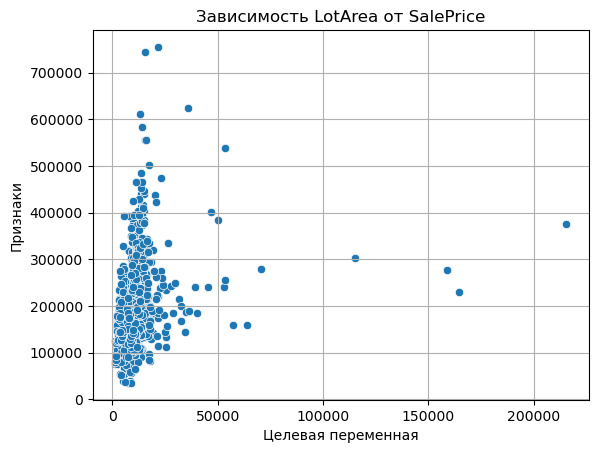

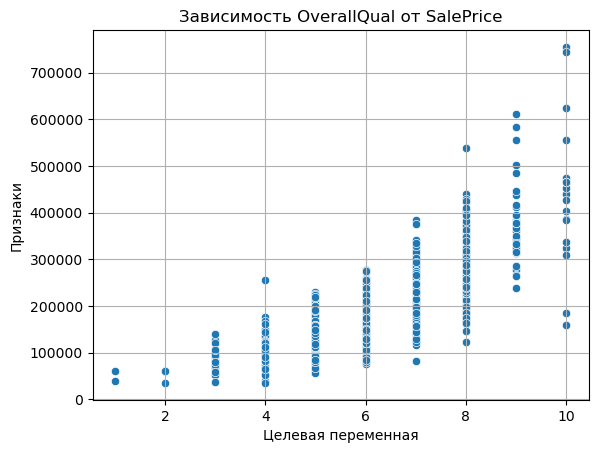

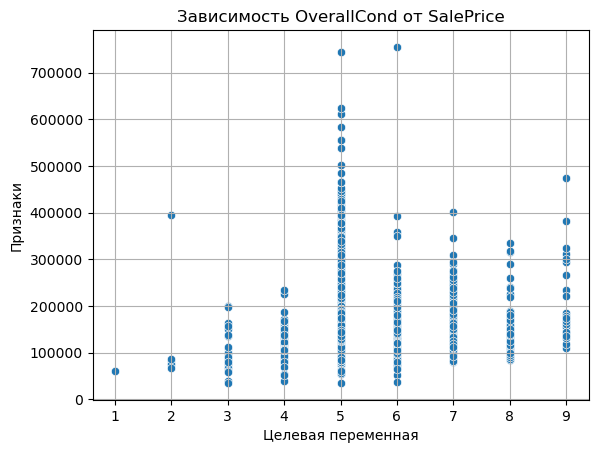

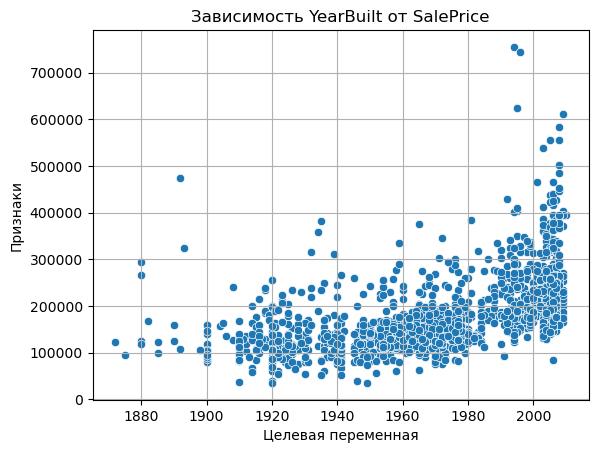

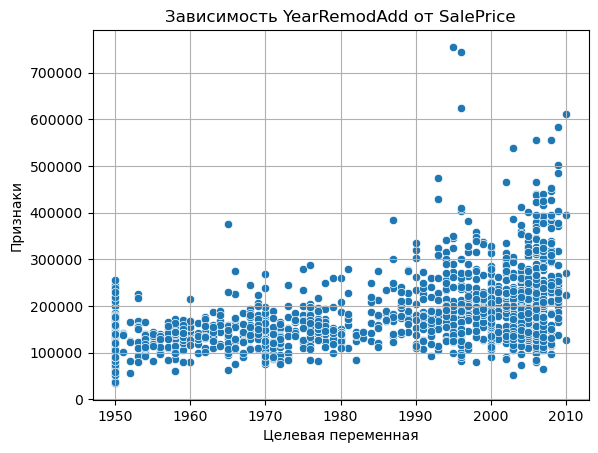

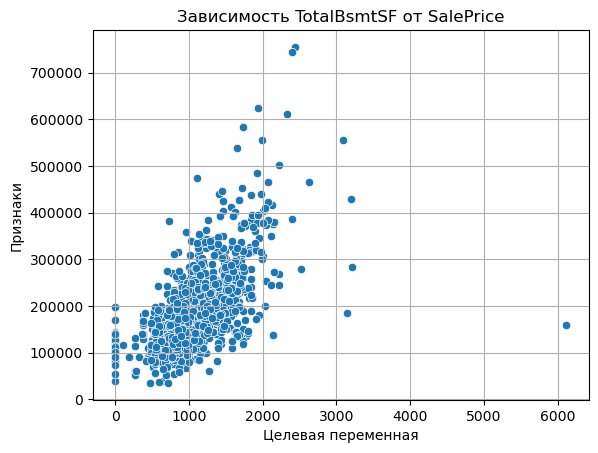

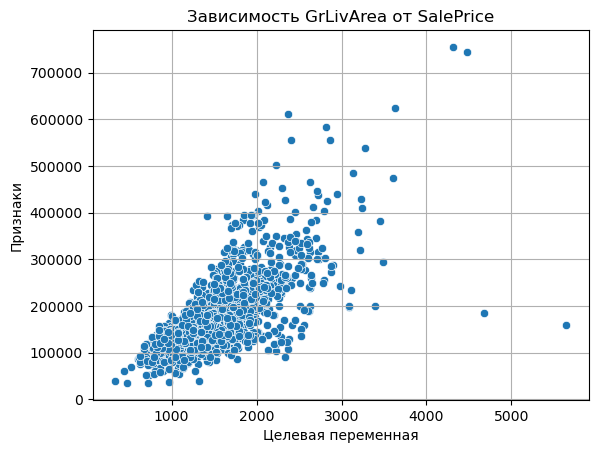

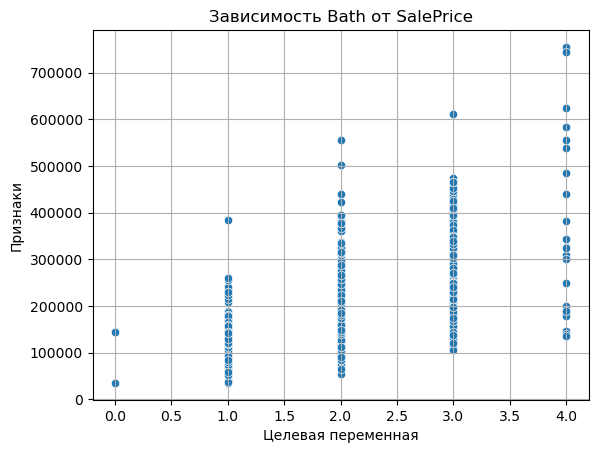

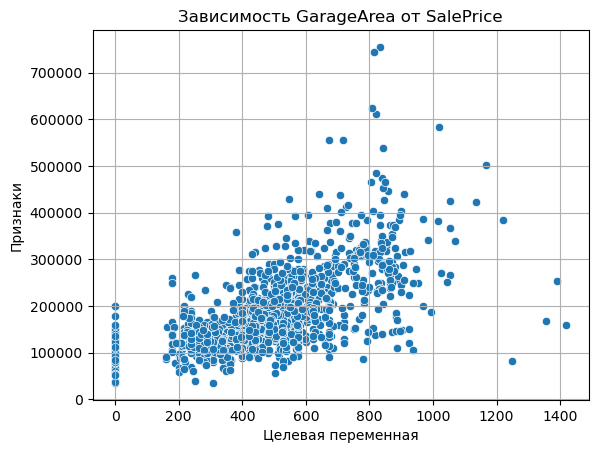

In [8]:
for plot in df_number.columns:
    if plot != 'SalePrice':
        sns.scatterplot(data= df_number, x= plot, y='SalePrice')
        plt.title(f'Зависимость {plot} от SalePrice' )
        plt.xlabel('Целевая переменная')
        plt.ylabel('Признаки')
        plt.grid(True)
        plt.show()

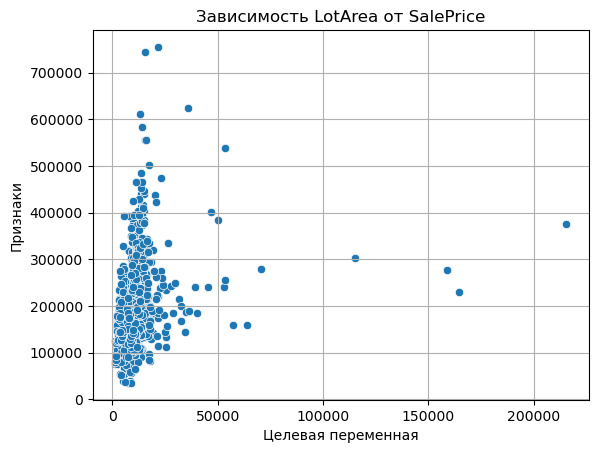

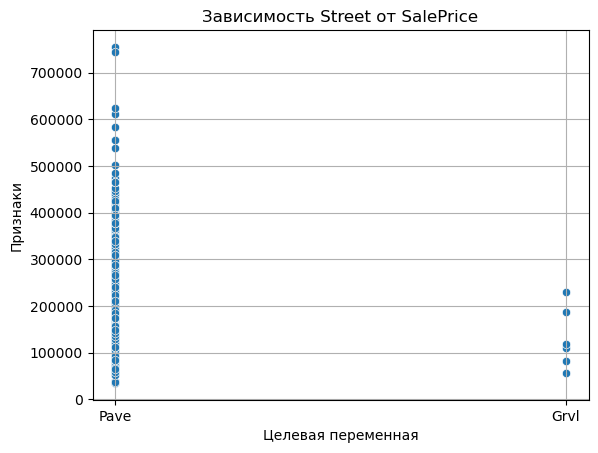

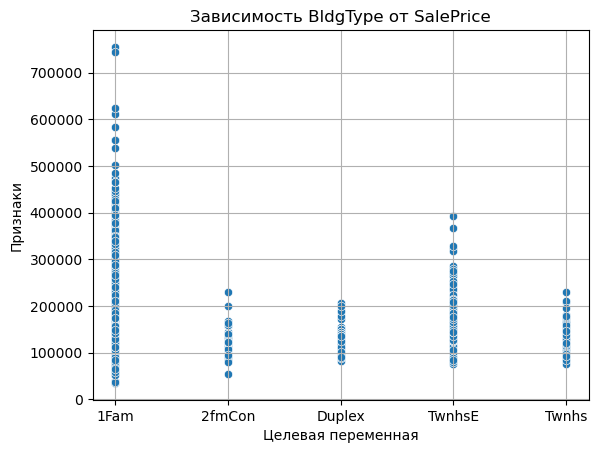

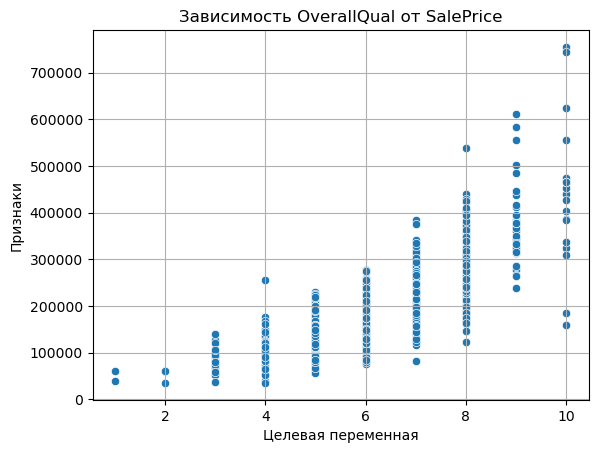

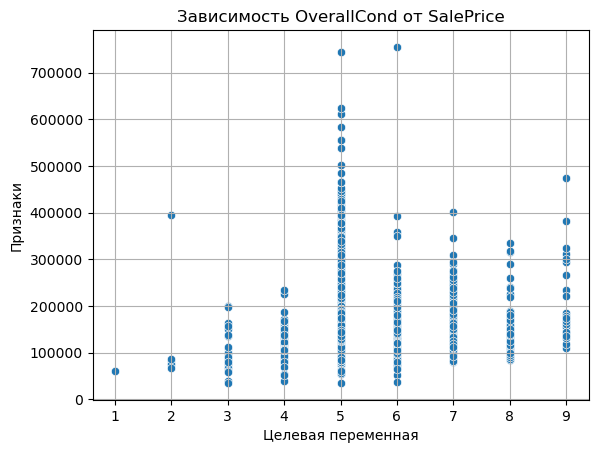

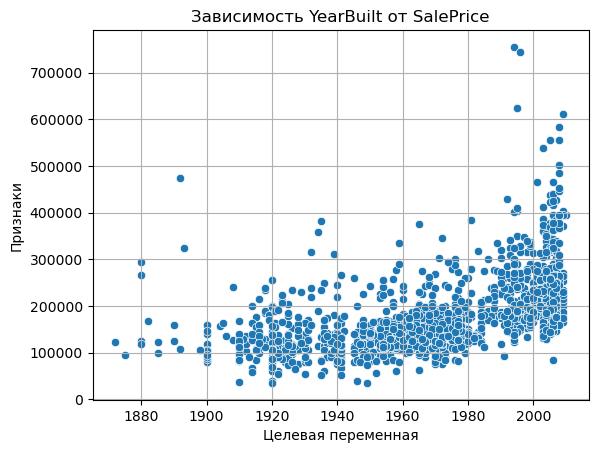

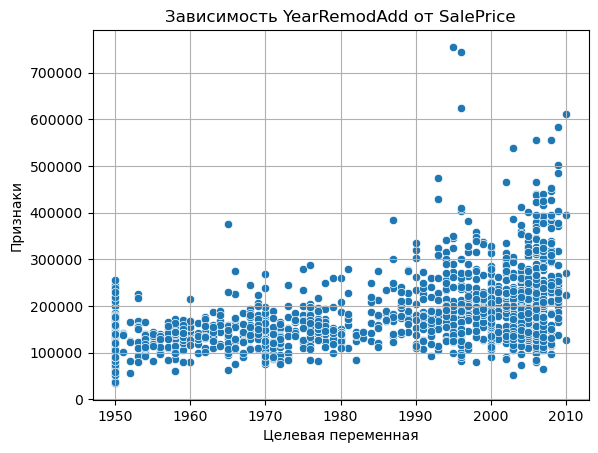

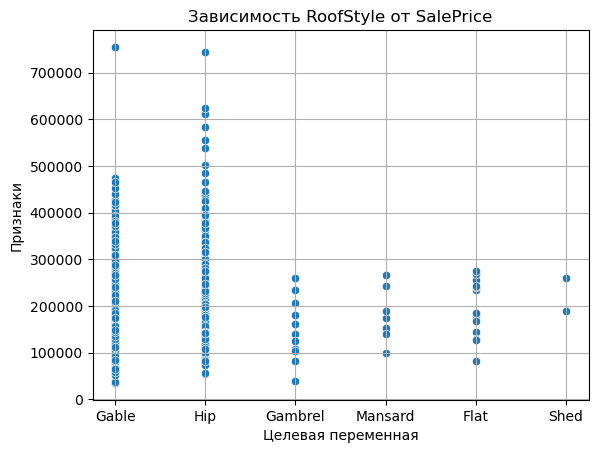

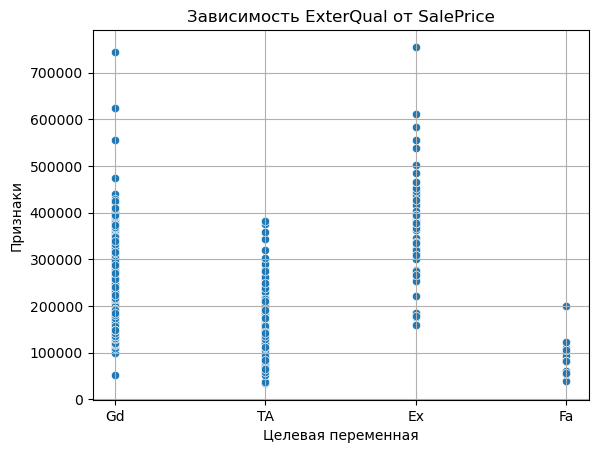

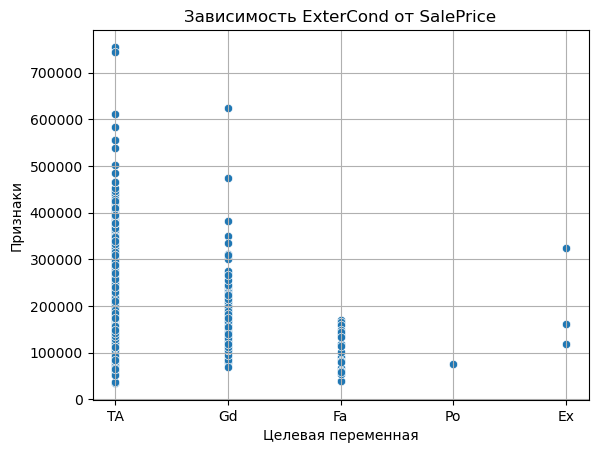

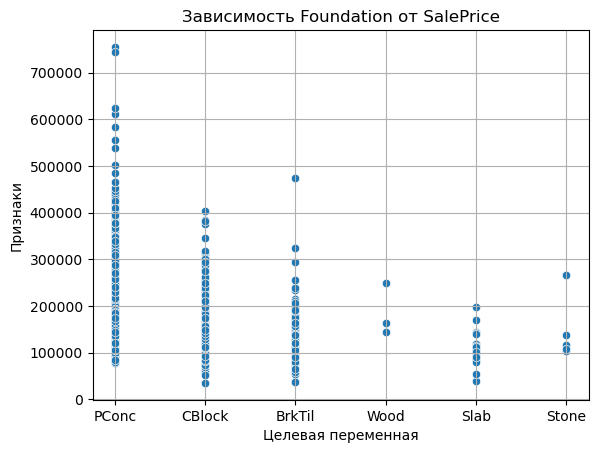

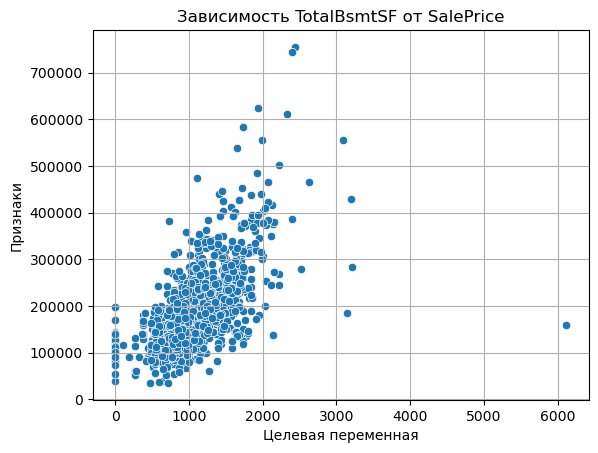

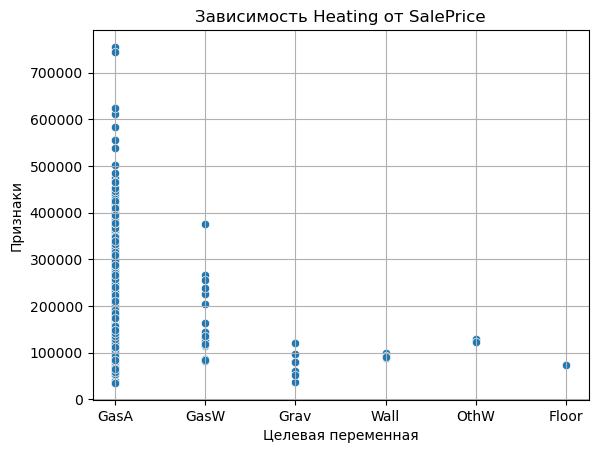

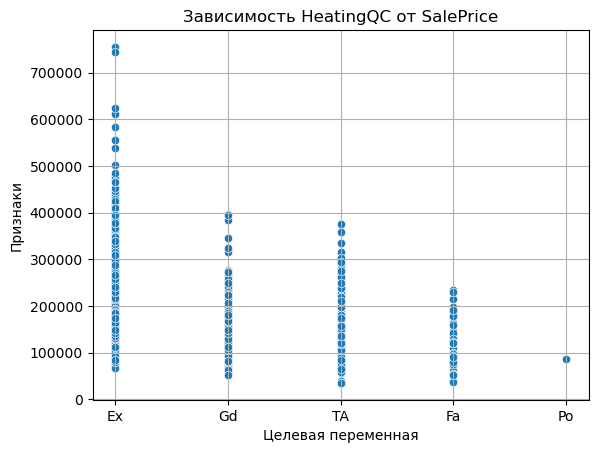

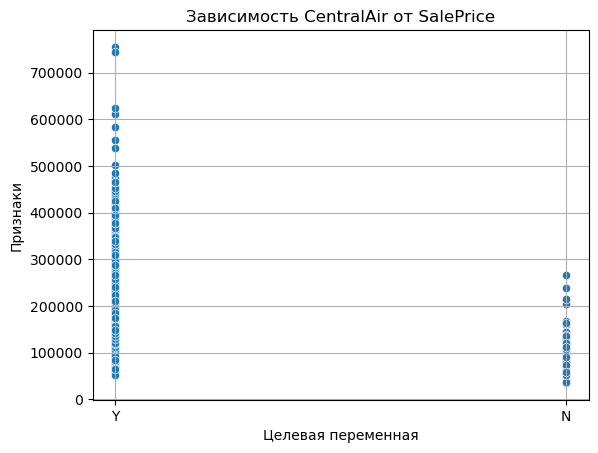

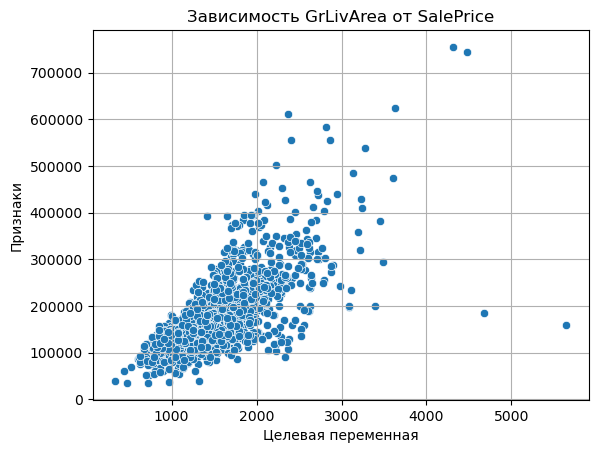

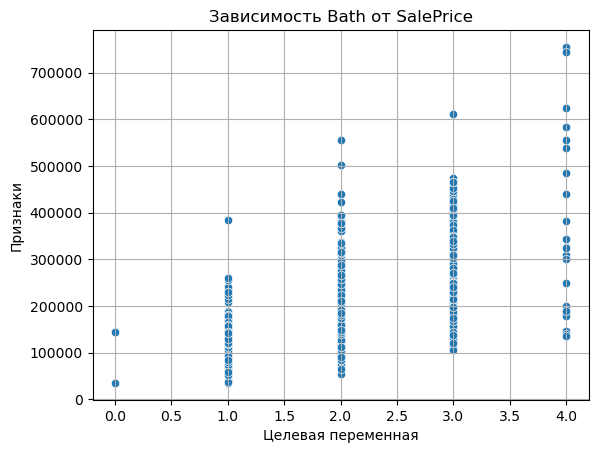

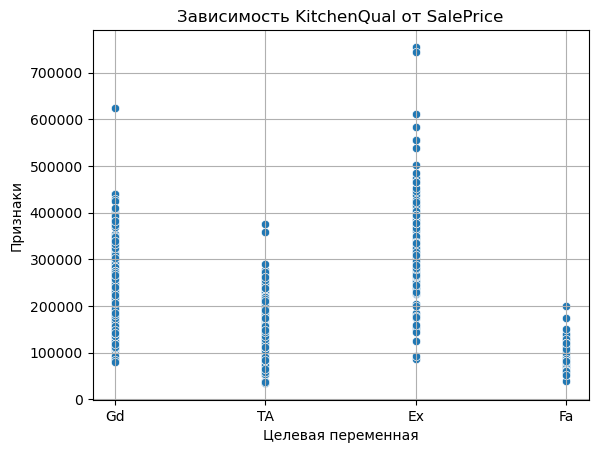

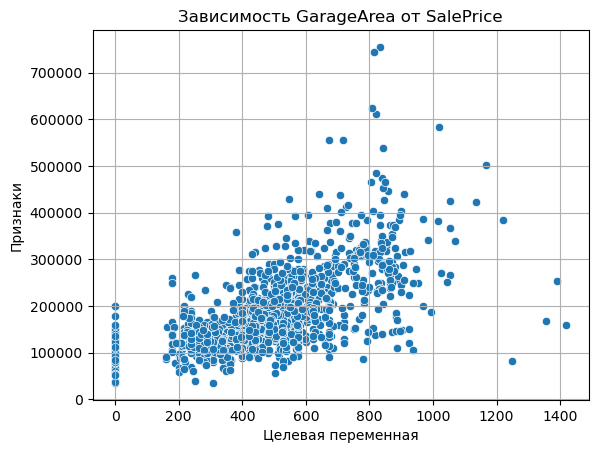

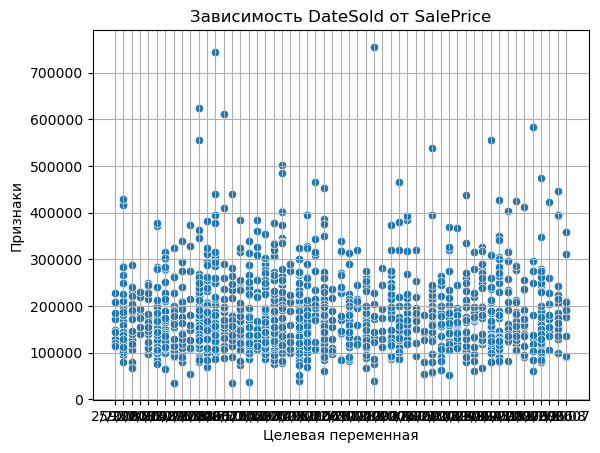

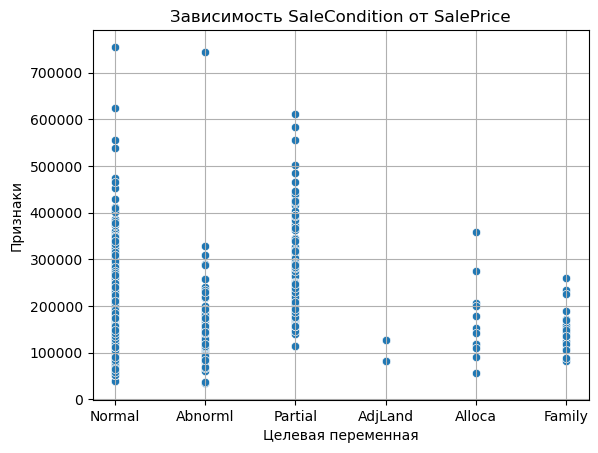

In [9]:
for plot in df.columns:
    if plot != 'SalePrice':
        sns.scatterplot(data= df, x= plot, y='SalePrice')
        plt.title(f'Зависимость {plot} от SalePrice' )
        plt.xlabel('Целевая переменная')
        plt.ylabel('Признаки')
        plt.grid(True)
        plt.show()

LotArea,OverallQual, TotalBsmtSF,DateSold - Гомоскедастичная зависимость от целевой переменной 
OverallCond,YearBuilt,YearRemodAdd,GrLivArea,GarageArea - гетероскедастичная зависимость от целевой переменной 

Разница между первоначальной датой постройки и реконструкции - отображает последние ремонтные работы в помещении, что повлияет на ценну помещения. 2 Отношение жилой площади к общей, должен быть важным показателем при определении цены помещения

In [10]:
df['GrLivArea/LotArea'] = df.apply(lambda x: x.GrLivArea/x.LotArea,axis=1)# Отношение жилой площади к общей
df['YearRemodAdd-YearBuilt'] = df.apply(lambda x: x.YearRemodAdd-x.YearBuilt,axis=1)# Разница между первоначальной датой постройки и реконструкции

In [11]:
x = df.drop('SalePrice',axis=1)

In [12]:
y = df.SalePrice

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [14]:
df_category = df.select_dtypes(include=['object','category']).columns
df_category

Index(['Street', 'BldgType', 'RoofStyle', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual',
       'DateSold', 'SaleCondition'],
      dtype='object')

In [15]:
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
encoder.fit(df[df_category])

c:\Users\79292\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [16]:
df.loc[:, encoder.get_feature_names_out()] = encoder.transform(df[df_category])
df.head()

,LotArea,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,DateSold_9/2006,DateSold_9/2007,DateSold_9/2008,DateSold_9/2009,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,9600,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,11250,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9550,Pave,1Fam,7,5,1915,1970,Gable,TA,TA,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,14260,Pave,1Fam,8,5,2000,2000,Gable,Gd,TA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
df= df.drop(df_category, axis=1)

In [18]:
df_number = df.select_dtypes(include='number')
df_number

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Bath,GarageArea,SalePrice,...,DateSold_9/2006,DateSold_9/2007,DateSold_9/2008,DateSold_9/2009,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,5,2003,2003,856,1710,3,548,208500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,9600,6,8,1976,1976,1262,1262,2,460,181500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,11250,7,5,2001,2002,920,1786,3,608,223500,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9550,7,5,1915,1970,756,1717,1,642,140000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,14260,8,5,2000,2000,1145,2198,3,836,250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,953,1647,3,460,175000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,13175,6,6,1978,1988,1542,2073,2,500,210000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,9042,7,9,1941,2006,1152,2340,2,252,266500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,9717,5,6,1950,1996,1078,1078,1,240,142125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
df_numb = df.drop('SalePrice',axis=1).columns
scaler =StandardScaler()
df_numb

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF', 'GrLivArea', 'Bath', 'GarageArea', 'GrLivArea/LotArea',
       ...
       'DateSold_9/2006', 'DateSold_9/2007', 'DateSold_9/2008',
       'DateSold_9/2009', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=117)

In [20]:
df[df_numb] = scaler.fit_transform(df[df_numb])
df.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Bath,GarageArea,SalePrice,...,DateSold_9/2006,DateSold_9/2007,DateSold_9/2008,DateSold_9/2009,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.207142,0.651479,-0.517200,1.050994,0.878668,-0.459303,0.370333,1.323851,0.351000,208500,...,-0.101885,-0.087129,-0.108540,-0.117851,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.091886,-0.071836,2.179628,0.156734,-0.429577,0.466465,-0.482512,0.065503,-0.060731,181500,...,-0.101885,-0.087129,-0.108540,-0.117851,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073480,0.651479,-0.517200,0.984752,0.830215,-0.313369,0.515013,1.323851,0.631726,223500,...,-0.101885,-0.087129,9.213162,-0.117851,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.687324,0.383659,-1.192845,0.790804,140000,...,-0.101885,-0.087129,-0.108540,-0.117851,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.375148,1.374795,-0.517200,0.951632,0.733308,0.199680,1.299326,1.323851,1.698485,250000,...,-0.101885,-0.087129,-0.108540,-0.117851,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [21]:
x = df.drop('SalePrice',axis=1)
y = df.SalePrice
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.7,random_state=42)
model_len = LinearRegression()
model_len.fit(x_train,y_train)

LinearRegression()

In [22]:
y_train_pred = model_len.predict(x_train)
y_test_pred = model_len.predict(x_test)

In [23]:
print(f'MAE train:{np.sqrt(mean_absolute_error(y_train,y_train_pred))}')
print(f'RMSE train:{mean_squared_error(y_train,y_train_pred)}')
print(f'R2 train:{r2_score(y_train,y_train_pred)}')

MAE train:157.58883696192615
RMSE train:1427420117.8641362
R2 train:0.7630609032956286


In [24]:
print(f'MAE test:{np.sqrt(mean_absolute_error(y_test,y_test_pred))}')
print(f'RMSE test:{mean_squared_error(y_test,y_test_pred)}')
print(f'R2 test:{r2_score(y_test,y_test_pred)}')

MAE test:162.90945990866277
RMSE test:1444880062.0145152
R2 test:0.7924702845153915


In [25]:
print('w_0:', model_len.intercept_)
coef = list(model_len.coef_)
for i in range(len(coef)):
    print(f'w_{i+1}:', coef[i], x_train.columns[i])

w_0: 179511.85504407444
w_1: 5498.842320386191 LotArea
w_2: 20638.278736428874 OverallQual
w_3: 5258.320510522144 OverallCond
w_4: -4.705381606208433e+17 YearBuilt
w_5: 3.216396585868328e+17 YearRemodAdd
w_6: 5884.2815483384275 TotalBsmtSF
w_7: 23897.689120304036 GrLivArea
w_8: 1598.3529383705254 Bath
w_9: 6897.84954352204 GarageArea
w_10: -3888.0 GrLivArea/LotArea
w_11: -3.813246119582805e+17 YearRemodAdd-YearBuilt
w_12: -5.1001443694753306e+17 Street_Grvl
w_13: -5.10014436947533e+17 Street_Pave
w_14: -7.477922863723672e+17 BldgType_1Fam
w_15: -2.9086563003333485e+17 BldgType_2fmCon
w_16: -3.7393700391995315e+17 BldgType_Duplex
w_17: -3.41125823996734e+17 BldgType_Twnhs
w_18: -5.413403512819616e+17 BldgType_TwnhsE
w_19: -3.6309909774395264e+17 RoofStyle_Flat
w_20: -1.5971929765453158e+18 RoofStyle_Gable
w_21: -3.342333357395289e+17 RoofStyle_Gambrel
w_22: -1.5340386192093783e+18 RoofStyle_Hip
w_23: -2.6699372541724918e+17 RoofStyle_Mansard
w_24: -1.4295948923549413e+17 RoofStyle_Shed


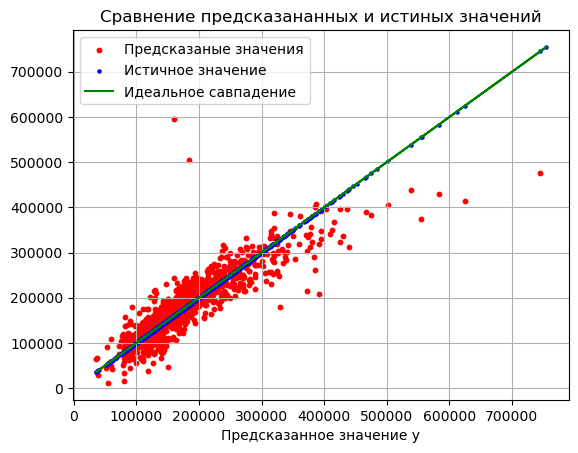

In [26]:
plt.scatter(y_train,y_train_pred, s=10, c= 'r', label = 'Предсказаные значения')
plt.scatter(y, y, s=5, c ='b',label = 'Истичное значение')
plt.plot(y,y, c ='g', label = 'Идеальное савпадение')
plt.xlabel('Истиное значение y')
plt.xlabel('Предсказанное значение y')
plt.title('Сравнение предсказананных и истиных значений')
plt.legend()
plt.grid(True)

In [28]:
coef = []
for i in range(-5, 5):
  alpha = 10**i
  lasso_regression = Lasso(alpha=alpha) 

  lasso_regression.fit(x_train, y_train)

  coef.append(list(lasso_regression.coef_))

  print('-'*5, 'lambda =', alpha, '-'*5)
  print(lasso_regression.score(x_train, y_train))
  print(lasso_regression.score(x_train, y_train))

c:\Users\79292\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.394e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 1e-05 -----
0.8123744525340271
0.8123744525340271


c:\Users\79292\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.394e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 0.0001 -----
0.8123744525340271
0.8123744525340271


c:\Users\79292\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.394e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 0.001 -----
0.812374452534004
0.812374452534004


c:\Users\79292\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.394e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 0.01 -----
0.8123744525316834
0.8123744525316834


c:\Users\79292\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.179e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 0.1 -----
0.8123744523037199
0.8123744523037199


c:\Users\79292\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.841e+09, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 1 -----
0.8123744331761202
0.8123744331761202
----- lambda = 10 -----
0.8123725188795137
0.8123725188795137
----- lambda = 100 -----
0.8121888169357332
0.8121888169357332
----- lambda = 1000 -----
0.8034381391948443
0.8034381391948443
----- lambda = 10000 -----
0.7332580612857296
0.7332580612857296


c:\Users\79292\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.233e+09, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


In [29]:
model_Lasso = Lasso(alpha=0.1)
model_Lasso.fit(x_train,y_train)

y_predict_Lasso_train= model_Lasso.predict(x_train)
y_predict_Lasso_test= model_Lasso.predict(x_test)


print(f'MAE test:{np.sqrt(mean_absolute_error(y_test,y_predict_Lasso_test))}')
print(f'RMSE test:{mean_squared_error(y_test,y_predict_Lasso_test)}')
print(f'R2 test:{r2_score(y_test,y_predict_Lasso_test)}')
print()
print(f'MAE train:{np.sqrt(mean_absolute_error(y_train,y_predict_Lasso_train))}')
print(f'RMSE train:{mean_squared_error(y_train,y_predict_Lasso_train)}')
print(f'R2 train:{r2_score(y_train,y_predict_Lasso_train)}')

MAE test:149.4065031914657
RMSE test:1166828391.3782341
R2 test:0.8324071523663563

MAE train:141.01046570549354
RMSE train:1130334694.156054
R2 train:0.8123744523037199


c:\Users\79292\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.179e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


In [30]:
print('W_0:', model_Lasso.intercept_)
coef = list(model_Lasso.coef_)
for i in range(len(coef)):
    print(f'w_{i+1}: {coef[i]} {x_train.columns[i]}')

W_0: 180247.17783500196
w_1: 4998.954617582446 LotArea
w_2: 21322.463812976388 OverallQual
w_3: 5356.556410012749 OverallCond
w_4: 12938.931543500583 YearBuilt
w_5: -716.9345040658168 YearRemodAdd
w_6: 5102.485480798948 TotalBsmtSF
w_7: 23988.61418996289 GrLivArea
w_8: 1484.7590077584573 Bath
w_9: 6906.004066496603 GarageArea
w_10: -4130.933214091399 GrLivArea/LotArea
w_11: 1450.9342739603355 YearRemodAdd-YearBuilt
w_12: -232.06641968457635 Street_Grvl
w_13: 4.324971883235142e-11 Street_Pave
w_14: 4025.710277844567 BldgType_1Fam
w_15: 226.72426155968034 BldgType_2fmCon
w_16: -2162.1786132510138 BldgType_Duplex
w_17: -419.9692947168896 BldgType_Twnhs
w_18: 1271.649533938848 BldgType_TwnhsE
w_19: 713.3736076944447 RoofStyle_Flat
w_20: -2889.6712451756125 RoofStyle_Gable
w_21: -616.447434615806 RoofStyle_Gambrel
w_22: 171.75480820618193 RoofStyle_Hip
w_23: 235.94918988964307 RoofStyle_Mansard
w_24: 285.8896420869964 RoofStyle_Shed
w_25: 4447.570771098062 ExterQual_Ex
w_26: 1297.4075258688

In [32]:
coef = []
for i in range(-6,3):
    alpha= 10**i

    model_Ridge = Ridge(alpha=alpha)
    model_Ridge.fit(x_train,y_train)

    coef.append(list(model_Ridge.coef_))
    
    print('-'*5,'lambda=',alpha,'-'*5)
    print(model_Ridge.score(x_train,y_train))
    print(model_Ridge.score(x_test,y_test))

----- lambda= 1e-06 -----
0.8123744525340272
0.8324046946857419
----- lambda= 1e-05 -----
0.8123744525340273
0.8324046945299406
----- lambda= 0.0001 -----
0.8123744525340224
0.8324046929719254
----- lambda= 0.001 -----


0.8123744525335304
0.8324046773916398
----- lambda= 0.01 -----
0.8123744524843285
0.8324045215752655
----- lambda= 0.1 -----
0.812374447569818
0.8324029620619384
----- lambda= 1 -----
0.8123739617189367
0.832387234143158
----- lambda= 10 -----
0.8123303527581843
0.8322185026636311
----- lambda= 100 -----
0.8101668664475975
0.8299387413753709


In [33]:
model_Ridge = Ridge(alpha=0.0001)
model_Ridge.fit(x_train,y_train)

y_predict_Ridg_train= model_Ridge.predict(x_train)
y_predict_Ridge_test= model_Ridge.predict(x_test)


print(f'MAE test:{np.sqrt(mean_absolute_error(y_test,y_predict_Ridge_test))}')
print(f'RMSE test:{mean_squared_error(y_test,y_predict_Ridge_test)}')
print(f'R2 test:{r2_score(y_test,y_predict_Ridge_test)}')
print()
print(f'MAE train:{np.sqrt(mean_absolute_error(y_train,y_predict_Ridg_train))}')
print(f'RMSE train:{mean_squared_error(y_train,y_predict_Ridg_train)}')
print(f'R2 train:{r2_score(y_train,y_predict_Ridg_train)}')

MAE test:149.40744375333463
RMSE test:1166845514.371775
R2 test:0.8324046929719254

MAE train:141.01084572415485
RMSE train:1130334692.7686155
R2 train:0.8123744525340224


In [34]:
print('w_0: ', model_Ridge.intercept_)
coef = model_Ridge.coef_
for i in range(len(coef)):
    print(f'w_{i+1}: {coef[i]} {x_train.columns[i]}')

w_0:  180247.1633342903
w_1: 4998.946488113825 LotArea
w_2: 21322.649621133172 OverallQual
w_3: 5356.754545133756 OverallCond
w_4: 6062.320196705818 YearBuilt
w_5: 3982.7866616679726 YearRemodAdd
w_6: 5102.468451691731 TotalBsmtSF
w_7: 23988.546526577746 GrLivArea
w_8: 1485.0394068899304 Bath
w_9: 6906.064481735738 GarageArea
w_10: -4131.284075268014 GrLivArea/LotArea
w_11: -4121.241694252727 YearRemodAdd-YearBuilt
w_12: -116.09401654654968 Street_Grvl
w_13: 116.0939898519568 Street_Pave
w_14: 2262.424152111789 BldgType_1Fam
w_15: -458.9963678176028 BldgType_2fmCon
w_16: -3044.0628198243644 BldgType_Duplex
w_17: -1224.1868775930045 BldgType_Twnhs
w_18: -4.483088437288884 BldgType_TwnhsE
w_19: 1004.1570585485422 RoofStyle_Flat
w_20: -1610.9019019407392 RoofStyle_Gable
w_21: -349.05560790781055 RoofStyle_Gambrel
w_22: 1399.9805406404564 RoofStyle_Hip
w_23: 449.86458123597396 RoofStyle_Mansard
w_24: 400.4201813997578 RoofStyle_Shed
w_25: 3522.5162858608037 ExterQual_Ex
w_26: 811.110618709

In [54]:
coef = model_Ridge.coef_
top_3_features = np.argsort(coef)[-3:]

for i in top_3_features:
    print(f"Признак: {x_train.columns[i]}, Коэффициент: {coef[i]}")

Признак: KitchenQual_Ex, Коэффициент: 8959.87356160511
Признак: OverallQual, Коэффициент: 19683.222517111455
Признак: GrLivArea, Коэффициент: 27546.27624671449


In [55]:
model_Ridge = Ridge(alpha=0.0001)
model_Ridge.fit(x,y)

y_predict_Ridge= model_Ridge.predict(x)


print(f'MAE test:{np.sqrt(mean_absolute_error(y,y_predict_Ridge))}')
print(f'RMSE test:{mean_squared_error(y,y_predict_Ridge)}')
print(f'R2 test:{r2_score(y,y_predict_Ridge)}')

MAE test:140.02428640415386
RMSE test:1089413457.3904257
R2 test:0.8272633619079703


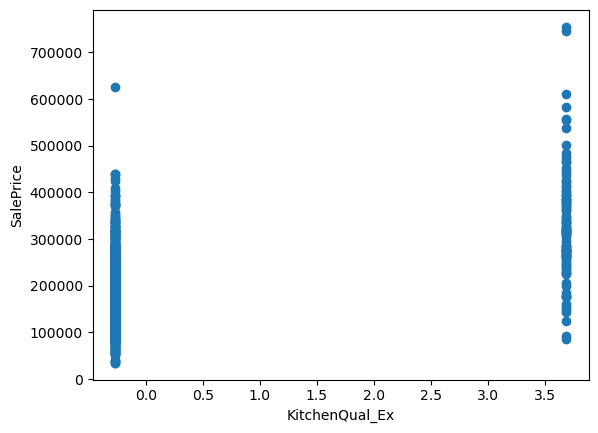

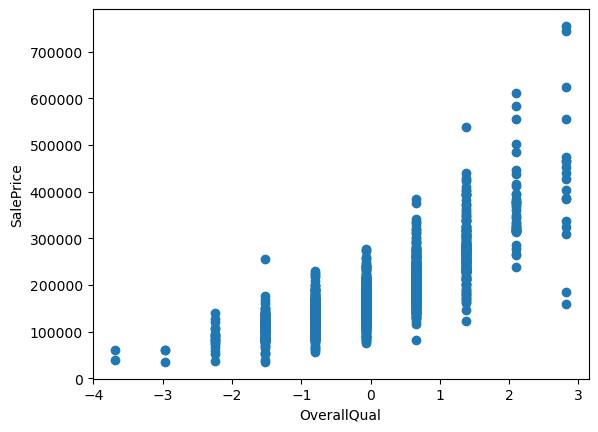

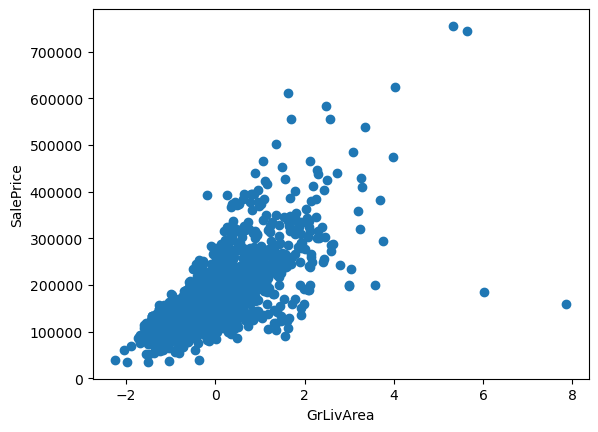

In [52]:
col = ['KitchenQual_Ex','OverallQual','GrLivArea']
for i in col:
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.scatter(x=df[i],y=df['SalePrice'])
    plt.show()

In [ ]:
coef = model_Ridge.coef_
min_3_feauters = np.argsort(coef)[:3]
for i in min_3_feauters:
    print(f'Признаки: {x_train.columns[i]}, Коэф: {coef[i]}')

Признаки: DateSold_1/2008, Коэф: -4183.3042555479315
Признаки: GrLivArea/LotArea, Коэф: -4131.284075268014
Признаки: YearRemodAdd-YearBuilt, Коэф: -4121.241694252727


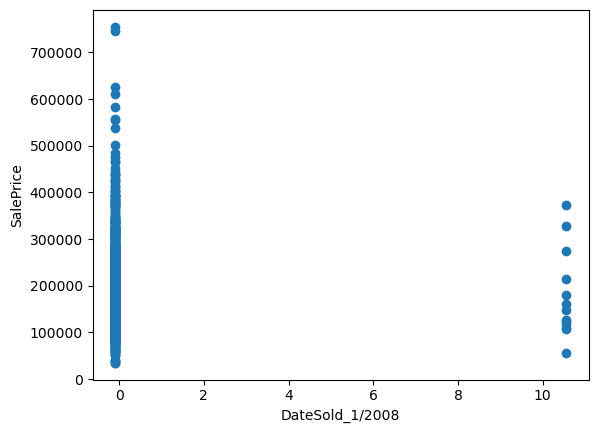

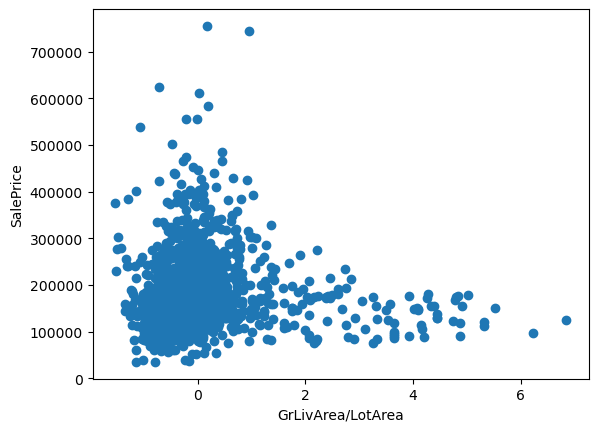

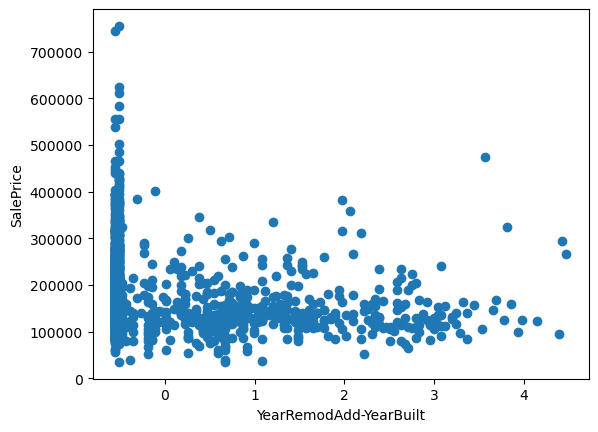

In [56]:
col = ['DateSold_1/2008','GrLivArea/LotArea','YearRemodAdd-YearBuilt']
for i in col:
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.scatter(x=df[i],y=df['SalePrice'])
    plt.show()

In [ ]:
coef = model_Lasso.coef_
min_3_feauters = np.where(coef==0)[0][0:3]
for i in min_3_feauters:
    print(f'Признаки: {x_train.columns[i]}, Коэф: {coef[i]}')

Признаки: ExterCond_TA, Коэф: 0.0


In [57]:
model_Lasso = Lasso(alpha=0.0001)
model_Lasso.fit(x,y)

y_predict_Lasso= model_Lasso.predict(x)


print(f'MAE test:{np.sqrt(mean_absolute_error(y,y_predict_Lasso))}')
print(f'RMSE test:{mean_squared_error(y,y_predict_Lasso)}')
print(f'R2 test:{r2_score(y,y_predict_Lasso)}')


MAE test:140.02428669944993
RMSE test:1089413457.3904078
R2 test:0.8272633619079732


c:\Users\79292\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.308e+10, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


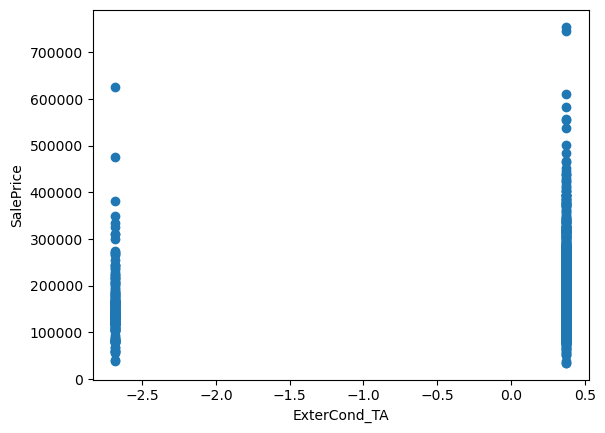

In [58]:
col = ['ExterCond_TA']
for i in col:
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.scatter(x=df[i],y=df['SalePrice'])
    plt.show()